In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
## Get the APPLE stock data
import yfinance as yf
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2025, 1, 8)
df = yf.download("AAPL", start=start, end=end, auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.620834,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.914818,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.487846,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.146942,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.307487,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2024-12-31,249.817383,250.419998,253.279999,249.429993,252.440002,39480700
2025-01-02,243.263199,243.850006,249.100006,241.820007,248.929993,55740700


In [7]:
print(df.head())
print(df.shape)

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.620834  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  71.914818  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.487846  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.146942  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.307487  75.797501  76.110001  74.290001  74.290001  132079200
(1262, 6)


In [8]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

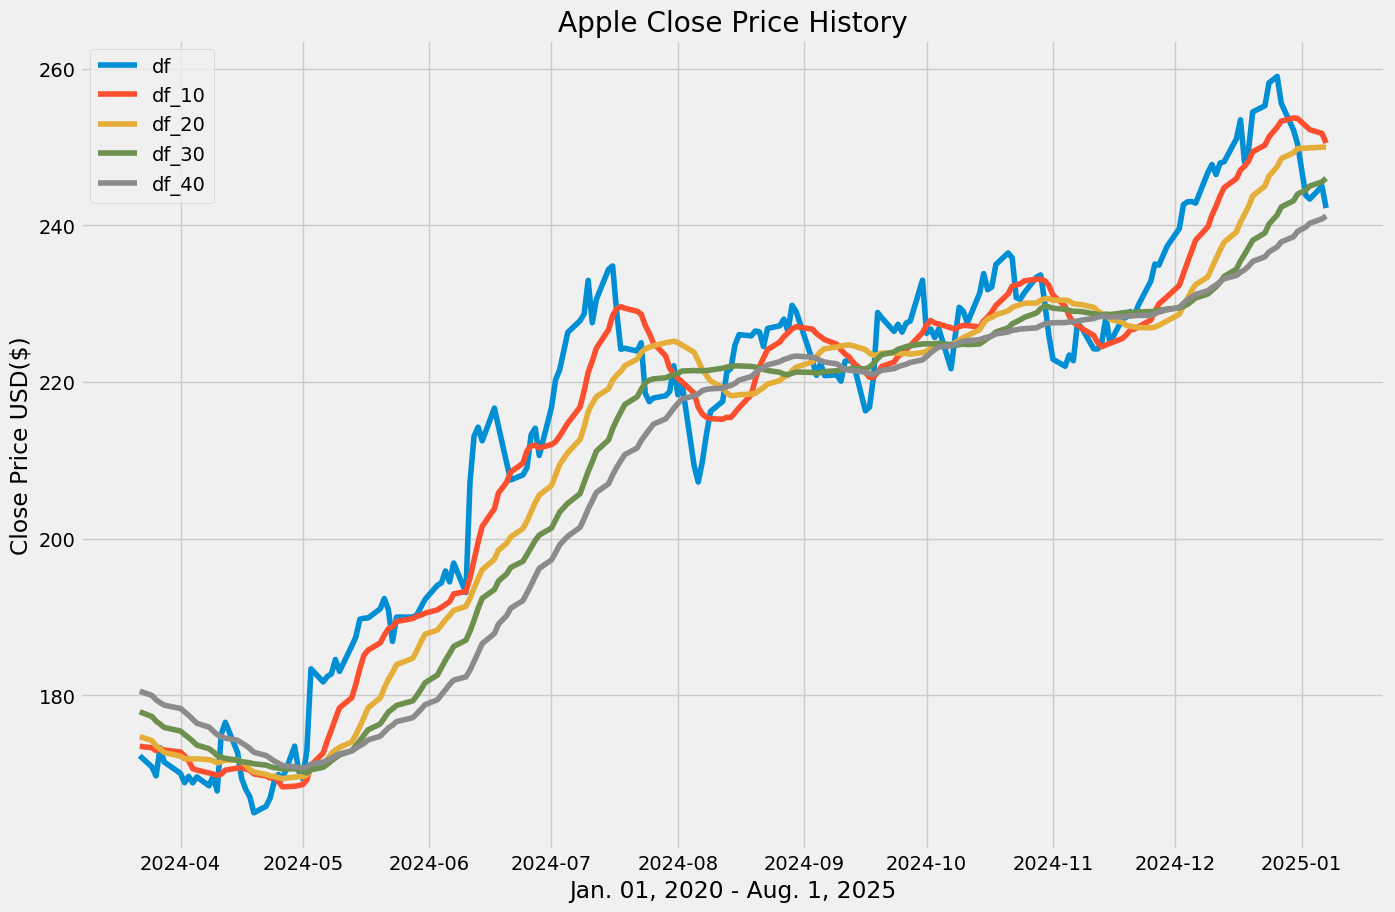

In [12]:
#Visualize the data
plt.figure(figsize=(15,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2020 - Aug. 1, 2025')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [23]:
# Create a new dataframe with only the 'Close column
data = df['Close']
data.head()

Ticker,AAPL
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


In [24]:
#Convert the dataframe to a numpy array
dataset = data.values

In [25]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1010

In [26]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data, scaled_data.shape

(array([[0.09360488],
        [0.09000752],
        [0.09292727],
        ...,
        [0.92282964],
        [0.93091134],
        [0.91716262]]),
 (1262, 1))

In [27]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.09360488, 0.09000752, 0.09292727, 0.09119023, 0.09710366,
       0.10503753, 0.10589988, 0.11406783, 0.10879502, 0.10714418,
       0.11194885, 0.11624844, 0.11358739, 0.11497951, 0.11686442,
       0.115731  , 0.1041998 , 0.11496718, 0.12315976, 0.12258073,
       0.1048897 , 0.10384252, 0.11639627, 0.11959939, 0.12423156,
       0.11784998, 0.11972256, 0.11733254, 0.1266832 , 0.1238127 ,
       0.12391128, 0.11658106, 0.12227274, 0.1181826 , 0.10925084,
       0.09093149, 0.07848862, 0.08411871, 0.06055118, 0.06035406,
       0.09170764, 0.08001628, 0.09654926, 0.08445137, 0.079659  ,
       0.05149625, 0.07511304, 0.06290424, 0.02939474, 0.06603345,
       0.02197831, 0.03509875, 0.02747287, 0.02514445, 0.00599969,
       0.        , 0.02773159, 0.02605612, 0.04197313, 0.02879108])]
[np.float64(0.03750108278362013)]

[array([0.09360488, 0.09000752, 0.09292727, 0.09119023, 0.09710366,
       0.10503753, 0.10589988, 0.11406783, 0.10879502, 0.10714418,
       0.11194885, 0.11

In [28]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(950, 60, 1)

#### Build LSTM Model

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - loss: 0.0076
Epoch 2/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - loss: 8.8003e-04
Epoch 3/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - loss: 6.0649e-04
Epoch 4/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - loss: 4.4320e-04
Epoch 5/5
950/950 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 4.8173e-04


In [33]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [34]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [35]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


In [37]:
print(predictions[0:5], y_test[0:5])

[[179.19427]
 [182.58784]
 [184.16977]
 [185.27322]
 [185.00061]] [[185.55999756]
 [185.13999939]
 [186.19000244]
 [185.58999634]
 [185.91999817]]


In [38]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(np.float64(8.014003269308215), np.float64(2.8309014941018726))

/tmp/ipython-input-983738799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


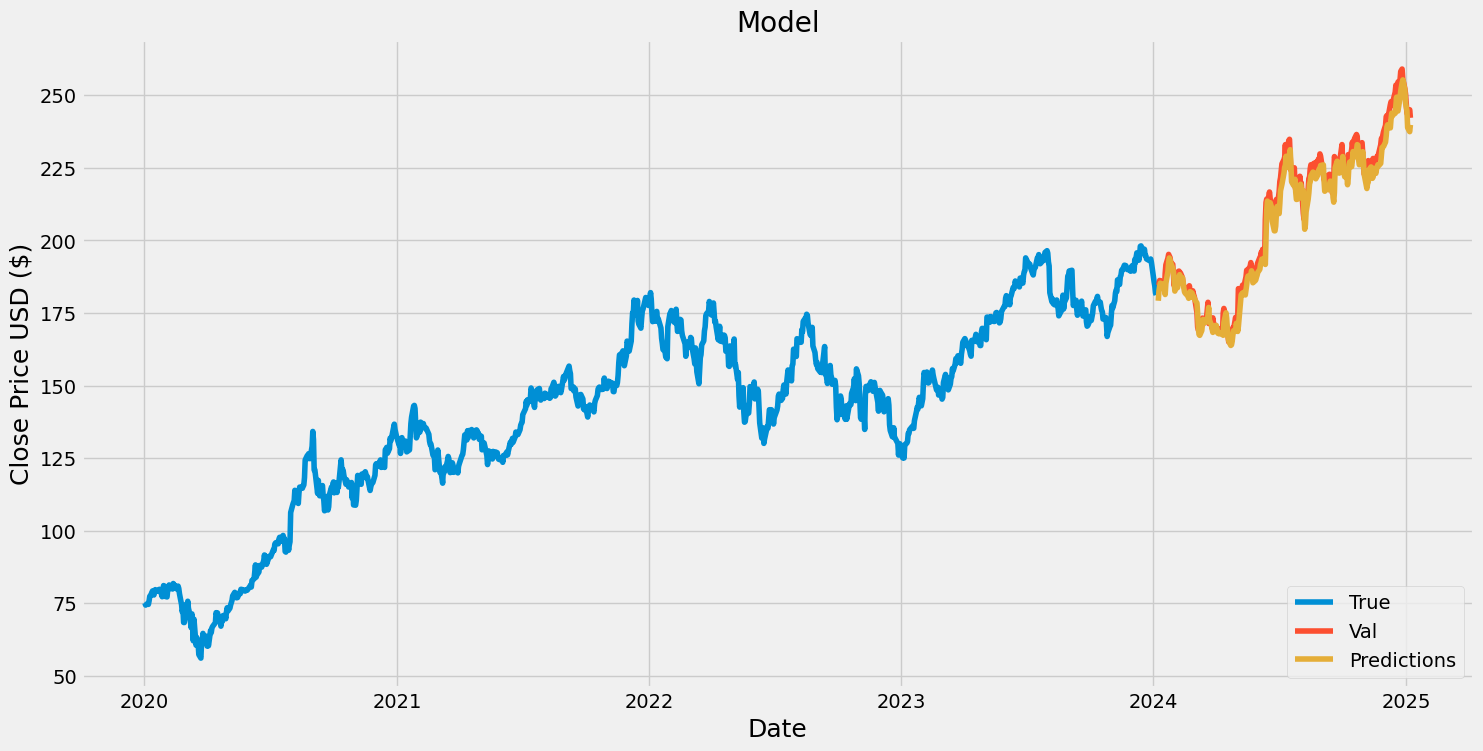

In [54]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [61]:
# Get the quote
import yfinance as yf
apple_quote = yf.download('AAPL', start='2020-01-01', end='2025-08-01', auto_adjust=False)
#Create a new dataframe with only the 'Close column
new_df = pd.DataFrame(apple_quote['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[204.45529]]


In [69]:
# Get the quote
import yfinance as yf
apple_quote2 = yf.download('AAPL', start='2020-01-01', end='2025-08-01', auto_adjust=False)
apple_quote2

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.620827,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.914825,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.487854,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.146919,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.307526,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2025-07-25,213.880005,213.880005,215.240005,213.399994,214.699997,40268800
2025-07-28,214.050003,214.050003,214.850006,213.059998,214.029999,37858000


### APPLE price prediction using facebook Prophet

In [77]:
#Load EDA Libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [78]:
dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 

In [105]:
## Load the data
import yfinance as yf
datae = yf.download('AAPL', start='2020-01-01', end='2025-08-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [106]:
datae.shape, datae.tail(), datae.columns

((1402, 6),
 Price        Adj Close       Close        High         Low        Open  \
 Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
 Date                                                                     
 2025-07-25  213.880005  213.880005  215.240005  213.399994  214.699997   
 2025-07-28  214.050003  214.050003  214.850006  213.059998  214.029999   
 2025-07-29  211.270004  211.270004  214.809998  210.820007  214.179993   
 2025-07-30  209.050003  209.050003  212.389999  207.720001  211.899994   
 2025-07-31  207.570007  207.570007  209.839996  207.160004  208.490005   
 
 Price         Volume  
 Ticker          AAPL  
 Date                  
 2025-07-25  40268800  
 2025-07-28  37858000  
 2025-07-29  51411700  
 2025-07-30  45512500  
 2025-07-31  80698400  ,
 MultiIndex([('Adj Close', 'AAPL'),
             (    'Close', 'AAPL'),
             (     'High', 'AAPL'),
             (      'Low', 'AAPL'),
             (     'Open', 'AAPL'),
             

In [145]:
# Prepare data for Prophet
prophet_df = pd.DataFrame() # Create an empty DataFrame
prophet_df['ds'] = data.index # Add the index (Date) of the 'data' Series as the 'ds' column
prophet_df['y'] = data.values # Add the values of the 'data' Series as the 'y' column

prophet_df.head()

,ds,y
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501


In [146]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1262 non-null   datetime64[ns]
 1   y       1262 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [147]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
df.head()

""
Date
2020-01-02
2020-01-03
2020-01-06
2020-01-07
2020-01-08


In [148]:
prophet_df.index[prophet_df['y'] < 0]

Index([], dtype='int64')

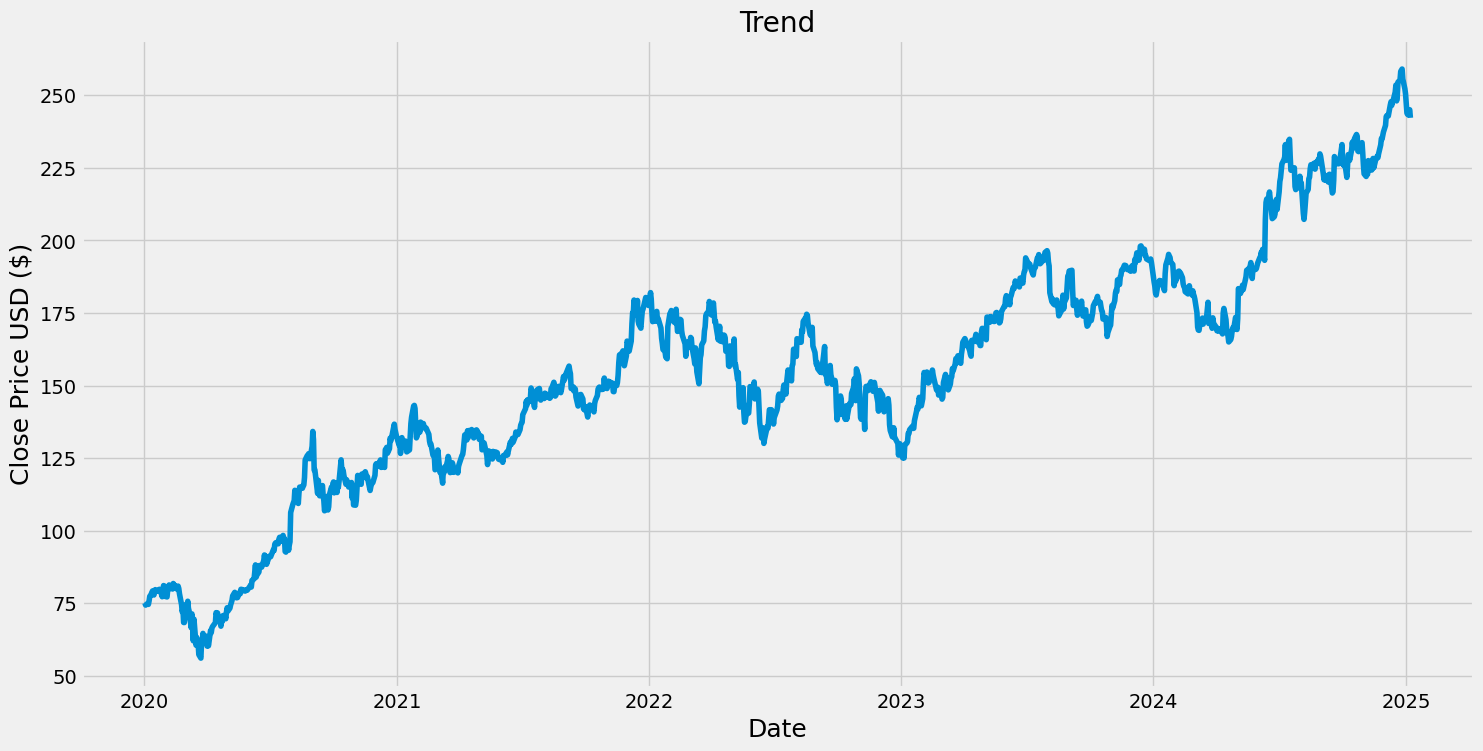

In [149]:
plt.figure(figsize=(16,8))
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [150]:
# yt = yt-y(t-1)
prophet_df['Close_shift'] = prophet_df['y'] - prophet_df['y'].shift(1)
z = prophet_df['Close_shift']

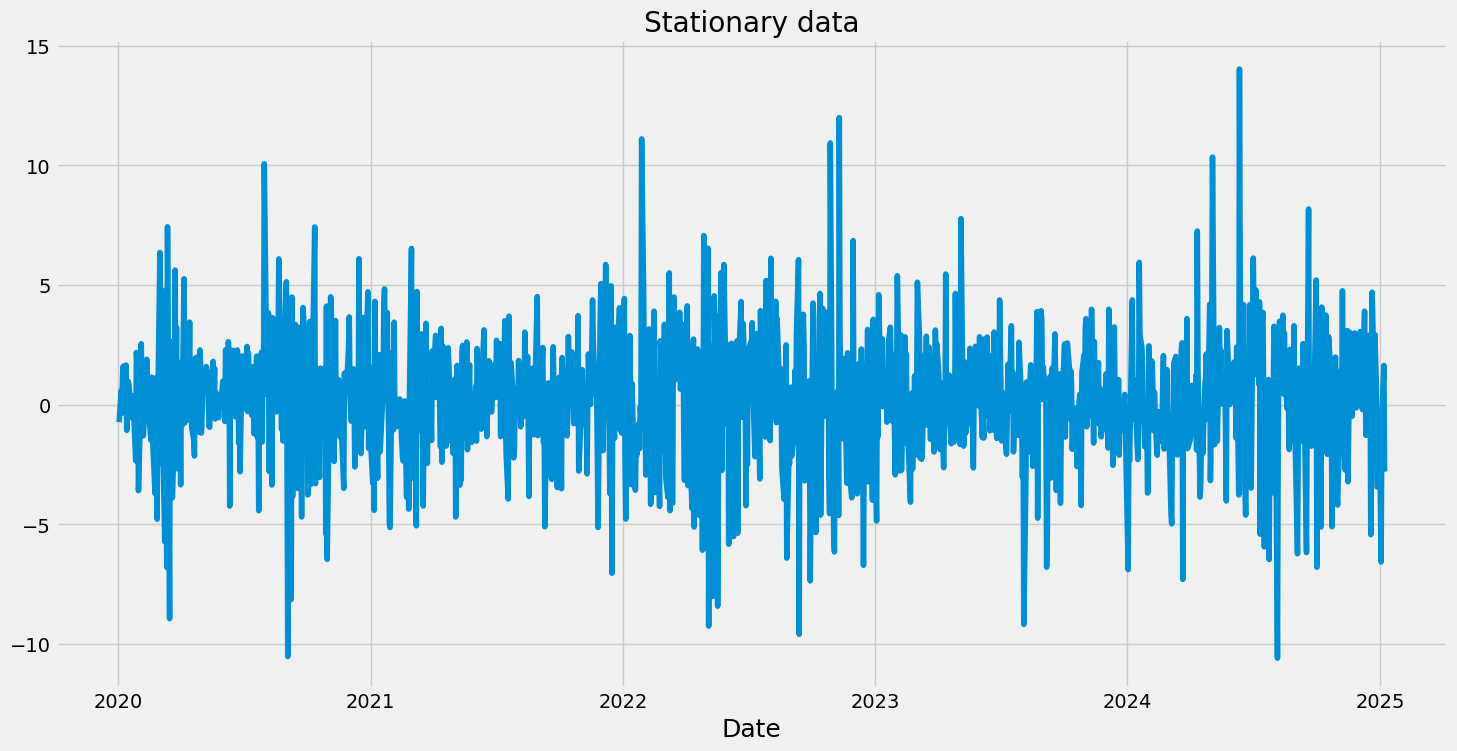

In [151]:
plt.figure(figsize=(16,8))
plt.plot(prophet_df['ds'],prophet_df['Close_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [152]:
from prophet import Prophet

In [153]:
model = Prophet()

In [154]:
prophet_df.columns

Index(['ds', 'y', 'Close_shift'], dtype='object')

In [155]:
prophet_df = prophet_df.rename(columns={ 'Close_shift':'z'})

In [156]:
## Split the Data
train_data_len = int(0.8*len(df))
train_data_len

1121

In [157]:
df_train = prophet_df[:train_data_len]
df_test = prophet_df[train_data_len:]
df_train.head(), df_train.shape

(          ds          y         z
 0 2020-01-02  75.087502       NaN
 1 2020-01-03  74.357498 -0.730003
 2 2020-01-06  74.949997  0.592499
 3 2020-01-07  74.597504 -0.352493
 4 2020-01-08  75.797501  1.199997,
 (1121, 3))

In [158]:
# Fit the Prophet model
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/skgvx2mp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/yw9vlba2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91711', 'data', 'file=/tmp/tmpncmzaedq/skgvx2mp.json', 'init=/tmp/tmpncmzaedq/yw9vlba2.json', 'output', 'file=/tmp/tmpncmzaedq/prophet_model_qzlg6jf/prophet_model-20250804124619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [159]:
periods = len(df)-len(df_train)
periods

281

In [160]:
# Create Future Datas of len(df)-len(df_train) days
future_dates = model.make_future_dataframe(periods=periods)

In [161]:
# Shape after adding 401 days
future_dates.shape

(1543, 1)

In [162]:
future_dates.head()

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08


In [163]:
# Make Prediction
prediction = model.predict(future_dates)

In [164]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,67.271894,64.846691,82.395557,67.271894,67.271894,6.582650,6.582650,6.582650,-1.539781,-1.539781,-1.539781,8.122431,8.122431,8.122431,0.0,0.0,0.0,73.854545
1,2020-01-03,67.436205,64.869276,81.735366,67.436205,67.436205,6.385285,6.385285,6.385285,-1.446805,-1.446805,-1.446805,7.832090,7.832090,7.832090,0.0,0.0,0.0,73.821491
2,2020-01-06,67.929138,64.952037,82.316166,67.929138,67.929138,5.751398,5.751398,5.751398,-1.285586,-1.285586,-1.285586,7.036984,7.036984,7.036984,0.0,0.0,0.0,73.680536
3,2020-01-07,68.093449,64.648212,82.104582,68.093449,68.093449,5.452519,5.452519,5.452519,-1.355880,-1.355880,-1.355880,6.808399,6.808399,6.808399,0.0,0.0,0.0,73.545968
4,2020-01-08,68.257760,65.092788,82.167632,68.257760,68.257760,5.172950,5.172950,5.172950,-1.430012,-1.430012,-1.430012,6.602963,6.602963,6.602963,0.0,0.0,0.0,73.430710


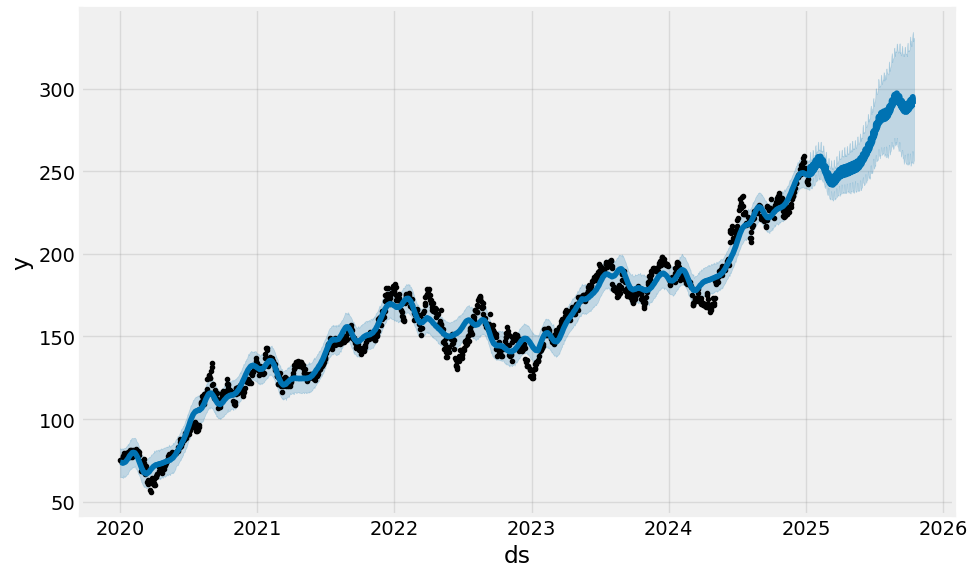

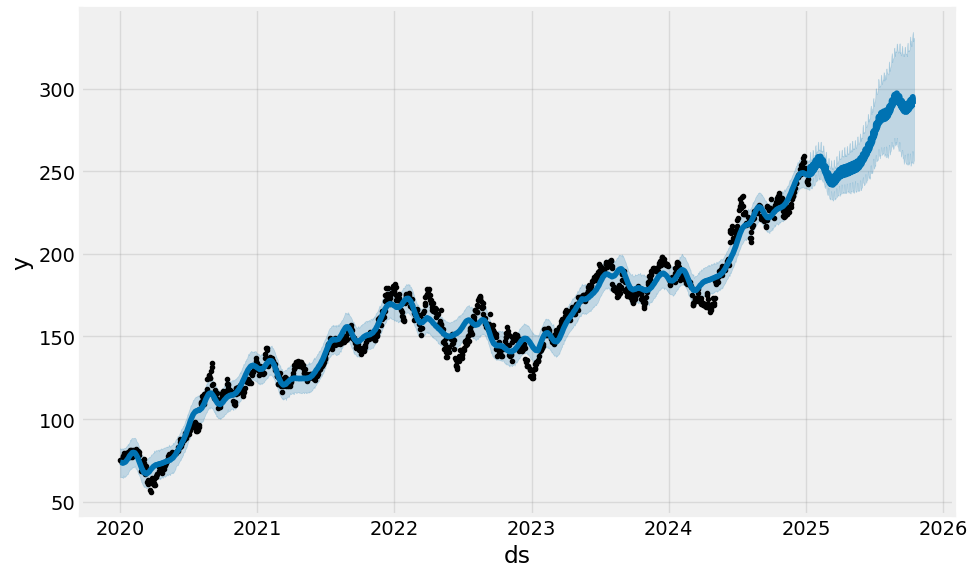

In [165]:
# Plot Our Predictions
model.plot(prediction)

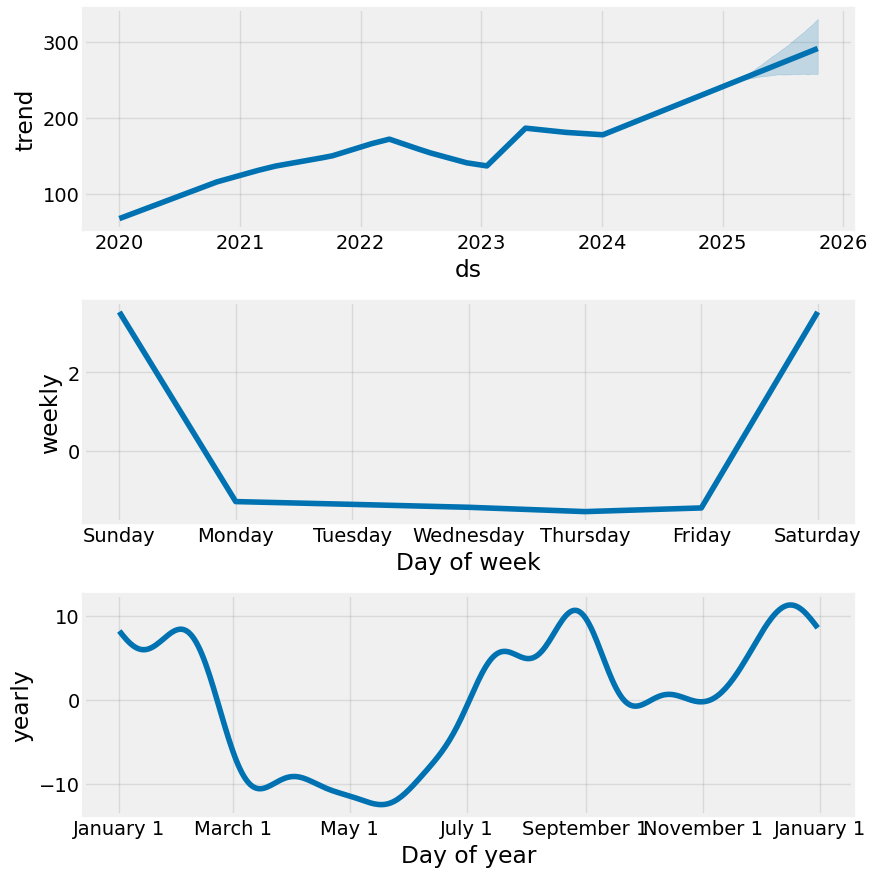

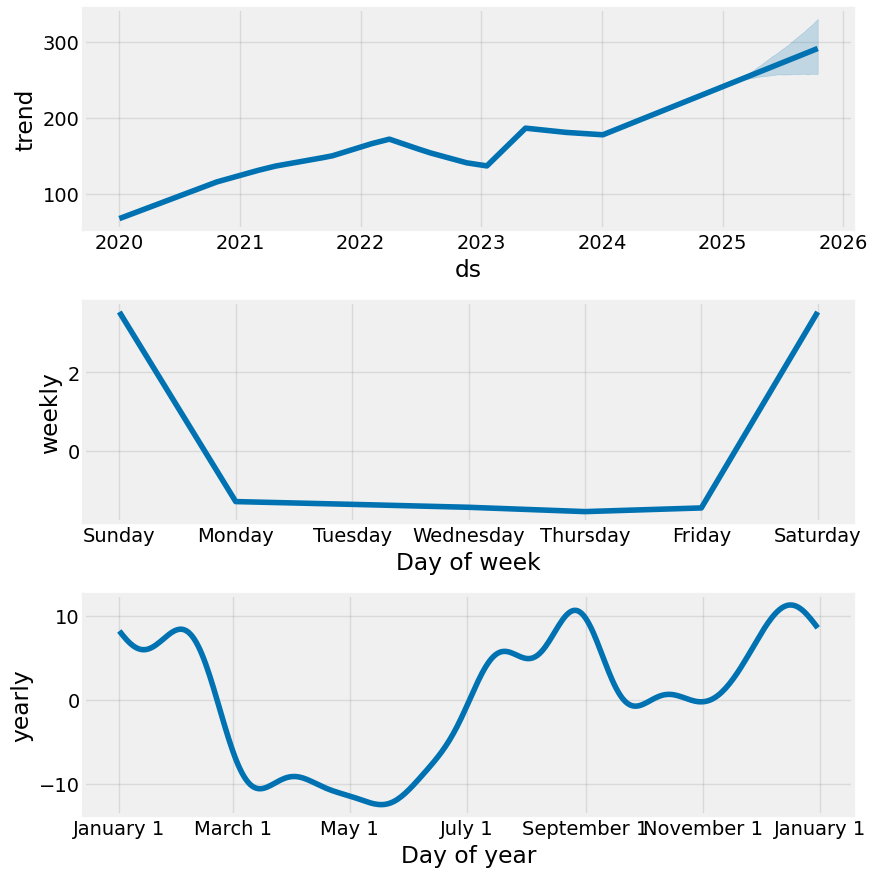

In [166]:
model.plot_components(prediction)

In [168]:
# import cross_validation
from prophet.diagnostics import cross_validation

In [169]:
df_train.shape, len(df)-len(df_train)

((1121, 3), 281)

In [171]:
cv = cross_validation(model, initial='1121 days', period='3 days', horizon = '381 days')

INFO:prophet:Making 111 forecasts with cutoffs between 2023-01-27 00:00:00 and 2023-12-23 00:00:00


  0%|          | 0/111 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/h67p8rvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/j0ft71mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27909', 'data', 'file=/tmp/tmpncmzaedq/h67p8rvv.json', 'init=/tmp/tmpncmzaedq/j0ft71mn.json', 'output', 'file=/tmp/tmpncmzaedq/prophet_models1ve__pu/prophet_model-20250804125014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/y2v59d2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpncmzaedq/38cy4_90.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [172]:
cv.head(), cv.shape

(          ds        yhat  yhat_lower  yhat_upper           y     cutoff
 0 2023-01-30  135.799606  129.063172  143.009039  143.000000 2023-01-27
 1 2023-01-31  135.728568  128.105170  142.103588  144.289993 2023-01-27
 2 2023-02-01  135.735973  128.326457  143.085502  145.429993 2023-01-27
 3 2023-02-02  135.314563  127.989301  142.324566  150.820007 2023-01-27
 4 2023-02-03  135.057160  128.083903  142.632767  154.500000 2023-01-27,
 (29051, 6))

### Performance metrics

In [173]:
from prophet.diagnostics import performance_metrics

In [174]:
df_train_pm = performance_metrics(cv)

In [175]:
df_train_pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,481.977783,21.953992,18.718937,0.109280,0.111095,0.111802,0.245050
1,40 days,494.781768,22.243691,18.996120,0.110816,0.113321,0.113436,0.242644
2,41 days,507.998508,22.538822,19.270454,0.112357,0.115123,0.115063,0.239569
3,42 days,522.238628,22.852541,19.571803,0.114048,0.117366,0.116855,0.237544
4,43 days,535.275720,23.136026,19.843896,0.115539,0.119705,0.118448,0.234704
...,...,...,...,...,...,...,...,...
338,377 days,2124.903046,46.096671,36.553627,0.184518,0.160020,0.201809,0.643148
339,378 days,2131.981479,46.173385,36.551669,0.184460,0.158295,0.201947,0.643295
340,379 days,2136.415172,46.221371,36.527751,0.184262,0.156354,0.201825,0.643276
341,380 days,2145.831327,46.323119,36.563681,0.184458,0.154268,0.202182,0.643463


### MSE & RMSE

In [176]:
MSE = sum(df_train_pm['mse'])/len(df_train_pm)
RMSE = sum(df_train_pm['rmse'])/len(df_train_pm)
MSE, RMSE

(1812.9143667640249, 41.99272836980882)

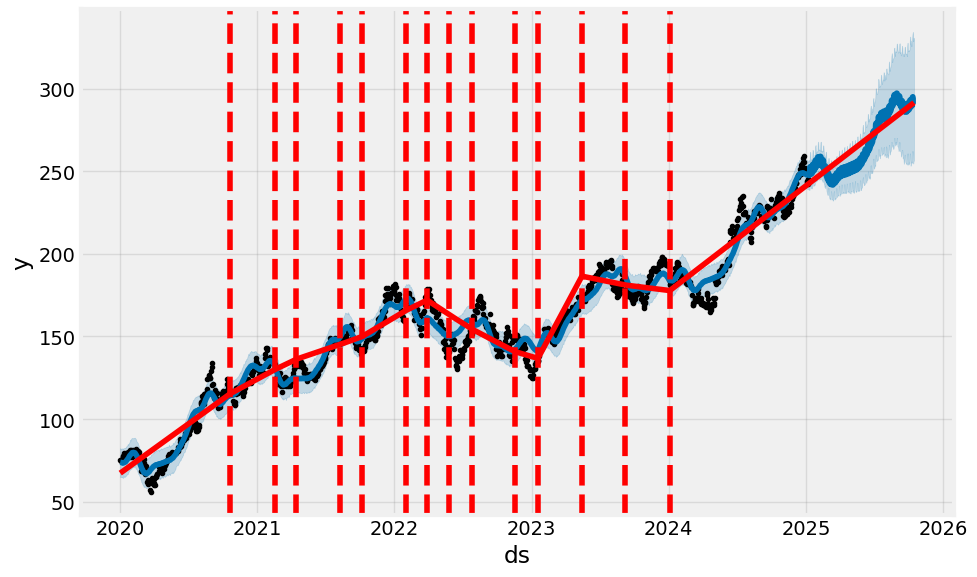

In [177]:
#Visualizing Performance Metrics
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), model, prediction)

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


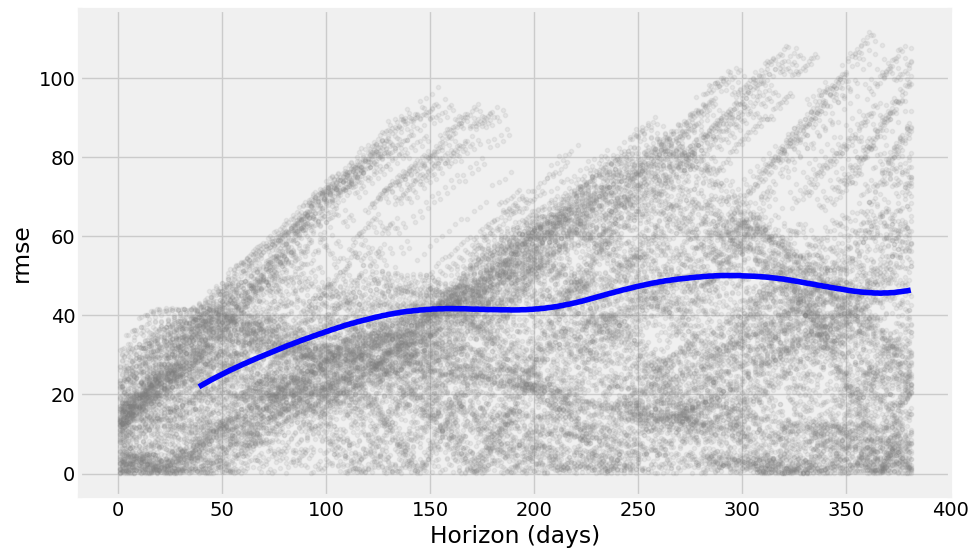

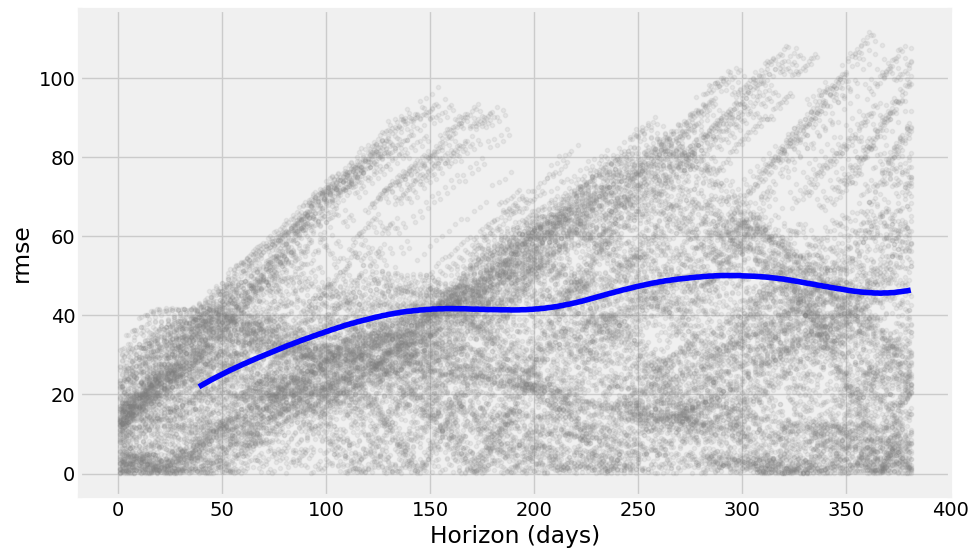

In [178]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')

### APPLE price prediction using ARIMA Model

In [182]:
#Importing libraries
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime # This line correctly imports the datetime module
warnings.filterwarnings('ignore')

In [185]:
#Apple stock market analysis
import yfinance as yf
df = yf.download('AAPL', start='2020-01-01', end='2025-08-01', auto_adjust=False)
#df['new_column'] = range(0, len(df))
df= df.reset_index()
#df = df.set_index('new_column')
#df = df.reset_index(drop=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620827,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,71.914825,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.487854,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.146919,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.307526,75.797501,76.110001,74.290001,74.290001,132079200


In [186]:
print(df.shape)
print(df.columns)

(1402, 7)
MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           1402 non-null   datetime64[ns]
 1   (Adj Close, AAPL)  1402 non-null   float64       
 2   (Close, AAPL)      1402 non-null   float64       
 3   (High, AAPL)       1402 non-null   float64       
 4   (Low, AAPL)        1402 non-null   float64       
 5   (Open, AAPL)       1402 non-null   float64       
 6   (Volume, AAPL)     1402 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 76.8 KB


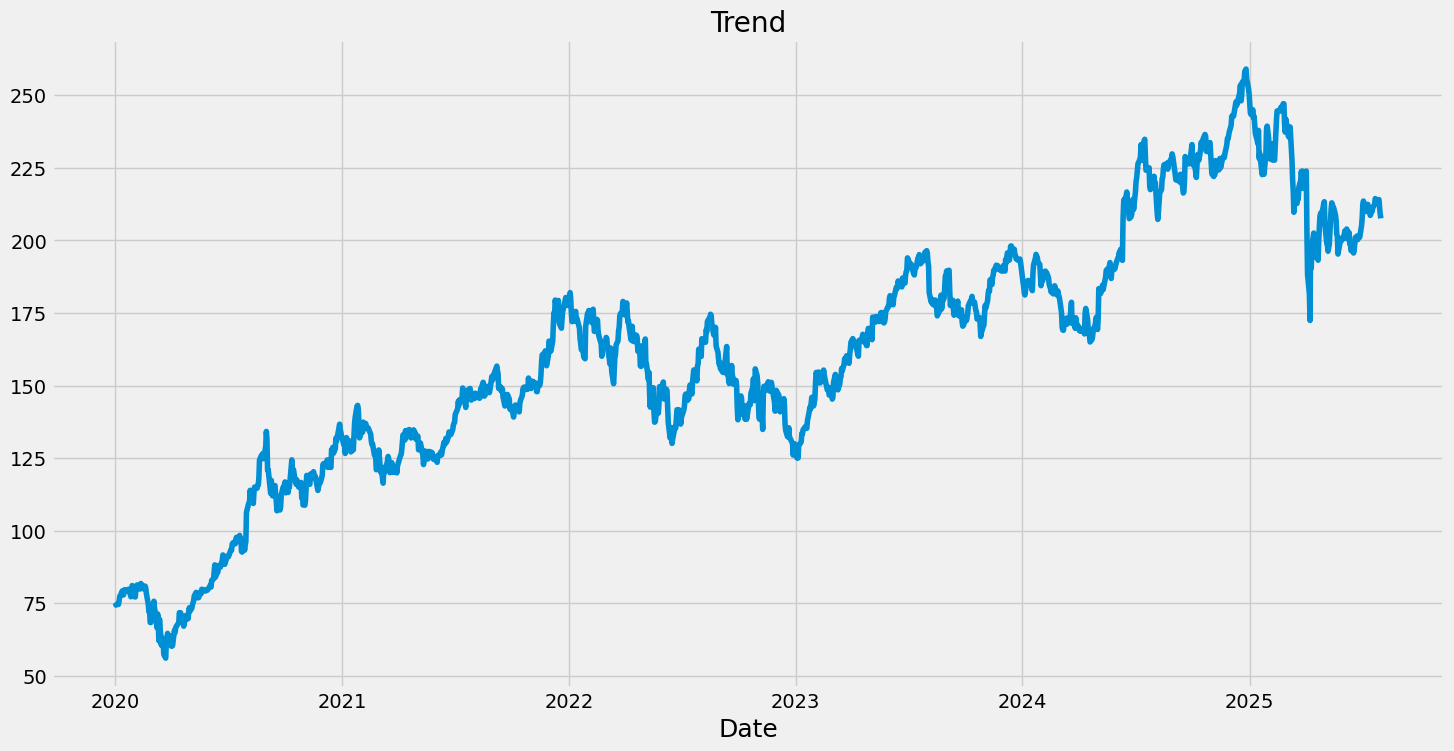

In [188]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.show()

In [189]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [190]:
test_result = adfuller(df['Close'])

In [191]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [192]:
adfuller_test(df['Close'])

ADF Test Statistics : -1.794807739737151
p-value : 0.38304253674896843
#Lags Used : 0
Number of Observations Used : 1401
Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary


In [193]:
df['Close_shift'] = df['Close'] - df['Close'].shift(1)

In [194]:
df['Close_shift'] = df['Close_shift'].fillna(method='bfill')
df['Close_shift']

,Close_shift
0,-0.730003
1,-0.730003
2,0.592499
3,-0.352493
4,1.199997
...,...
1397,0.120010
1398,0.169998
1399,-2.779999
1400,-2.220001


In [195]:
test_result = adfuller(df['Close_shift'])

In [196]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(close):
  result = adfuller(close)
  labels = ['ADF Test Statistics','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary")
  else:
    print("Weak evidence against the null hypothesis(H0), means accept the null hypothesis, i.e. data is non stationary")

In [197]:
adfuller_test(df['Close_shift'])

ADF Test Statistics : -22.23776252275927
p-value : 0.0
#Lags Used : 2
Number of Observations Used : 1399
Strong evidence against the null hypothesis(H0), reject the null hypothesis,i.e. data is stationary


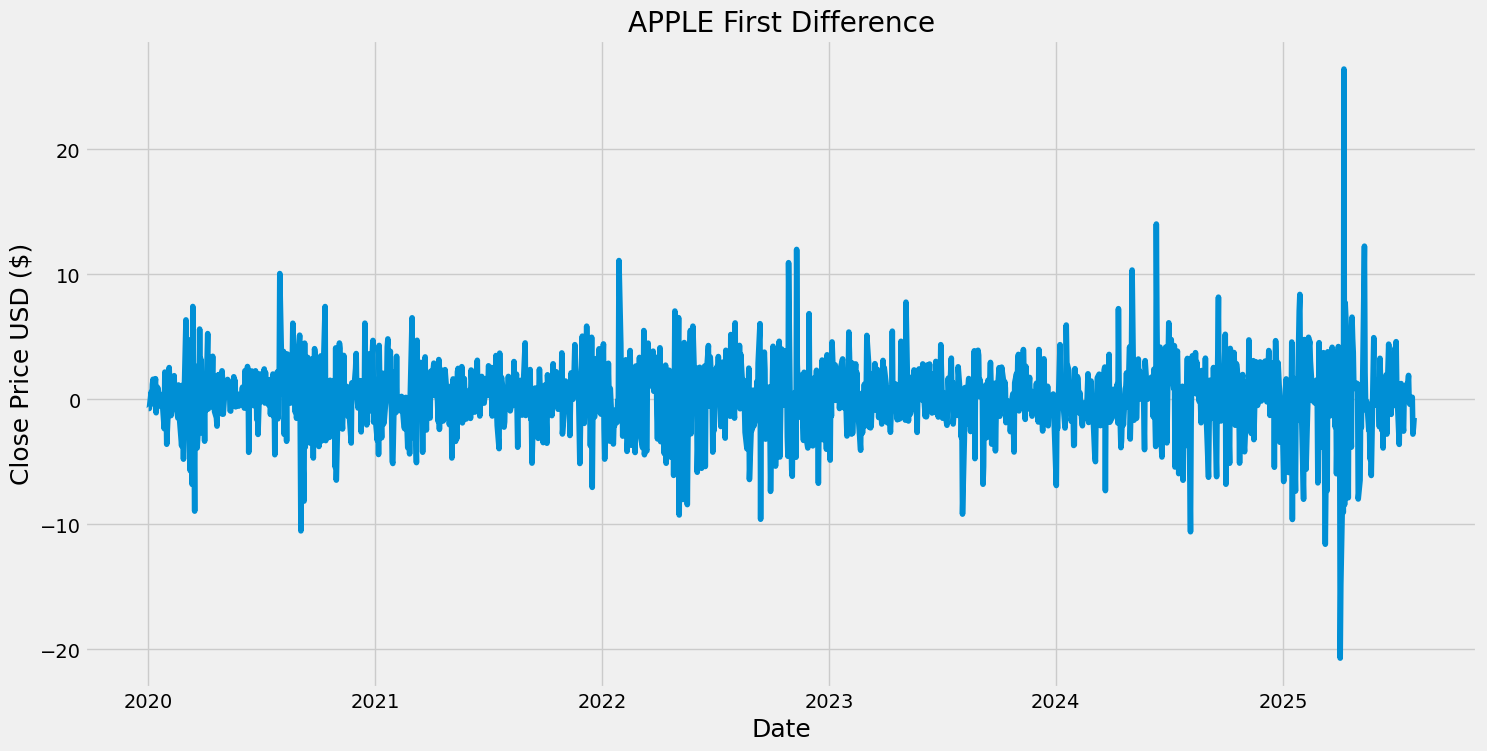

In [198]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['Close_shift'])
plt.title("APPLE First Difference")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Auto Regressive Model

In [199]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

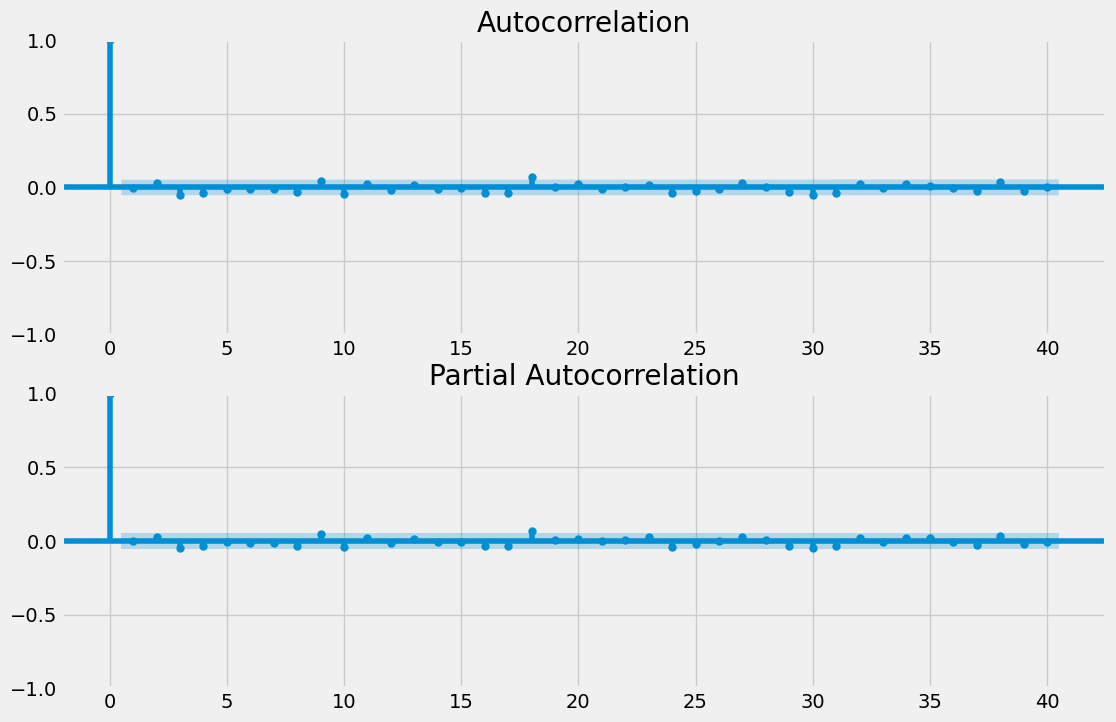

In [200]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close_shift'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close_shift'].iloc[1:],lags=40,ax=ax2)

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

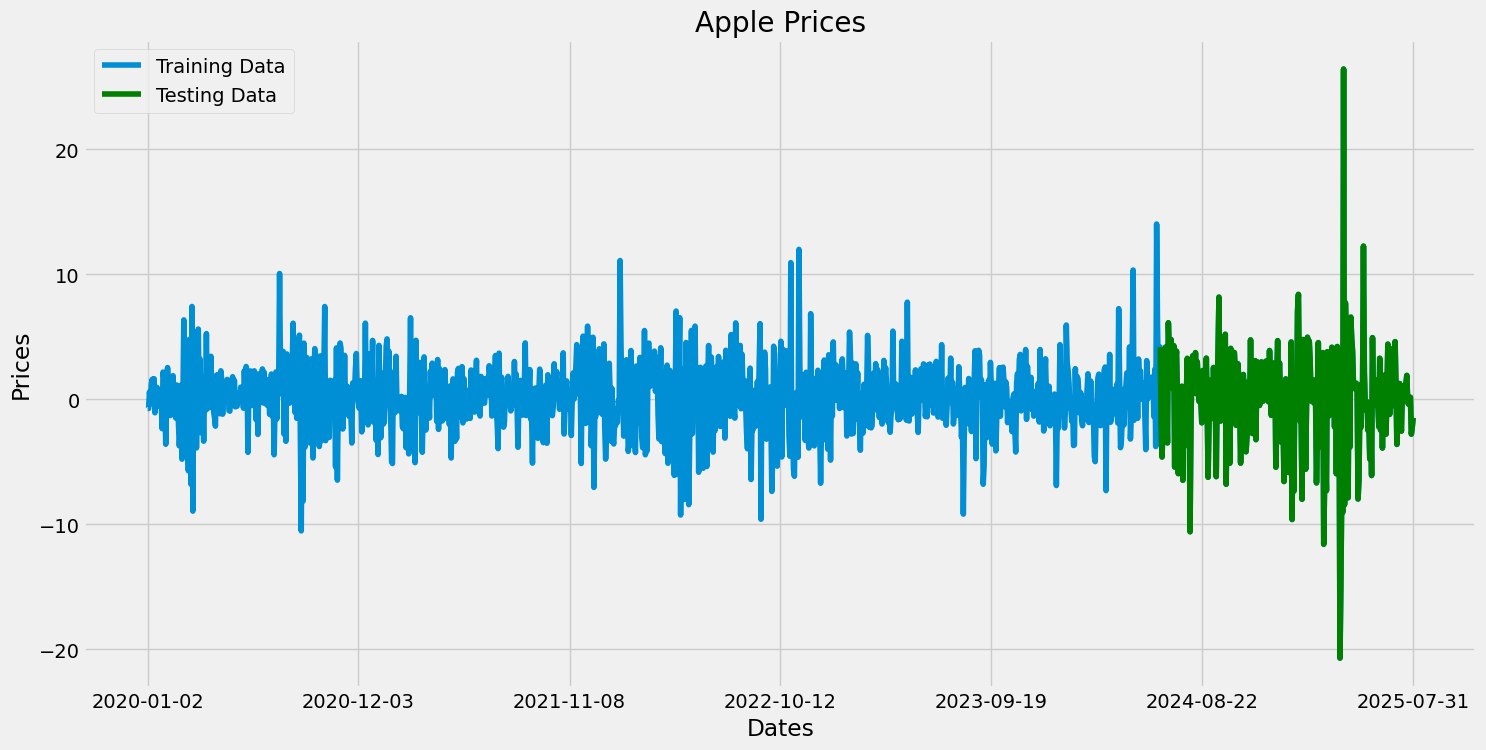

In [202]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close_shift'], label='Training Data')
plt.plot(test_data['Close_shift'], 'green', label='Testing Data')

# Select dates for x-axis ticks
n_ticks = 7 # You can adjust the number of ticks as needed
tick_indices = np.linspace(0, len(df) - 1, n_ticks, dtype=int)
tick_dates = df['Date'][tick_indices]

plt.xticks(tick_indices, tick_dates.dt.strftime('%Y-%m-%d')) # Use indices for location and formatted dates for labels
plt.legend()
plt.show()

In [203]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [205]:
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
#model=ARIMA(train_data['Close_shift'],order=(1,1,1))
model=ARIMA(df['Close_shift'],order=(1,0,1))
model_fit=model.fit()

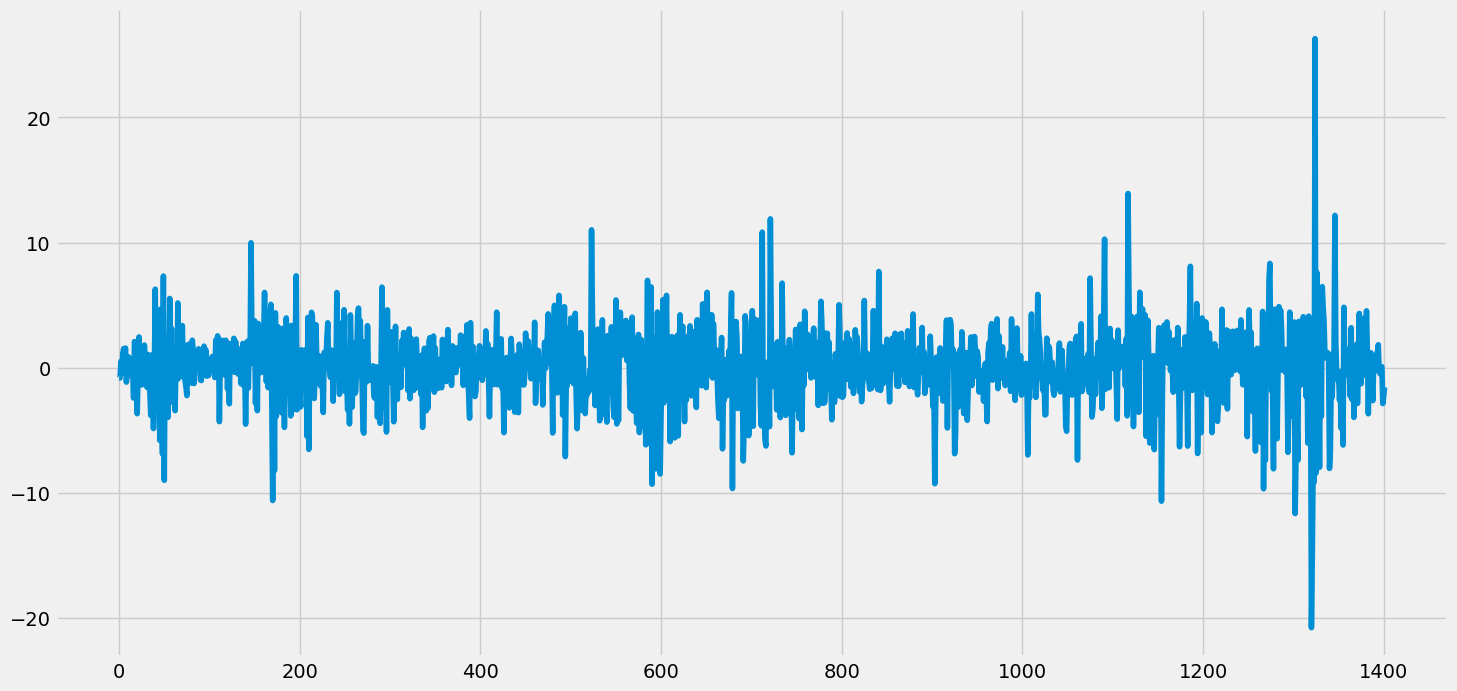

In [207]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
plt.figure(figsize=(16,8))
#residuals.plot()
plt.plot(residuals)

In [208]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Close_shift   No. Observations:                 1402
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3527.405
Date:                Mon, 04 Aug 2025   AIC                           7062.809
Time:                        13:11:46   BIC                           7083.792
Sample:                             0   HQIC                          7070.653
                               - 1402                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0940      0.082      1.142      0.254      -0.067       0.255
ar.L1         -0.0018      5.677     -0.000      1.000     -11.128      11.125
ma.L1         -0.0017      5.677     -0.000      1.000     -11.128      11.124
sigma2         8.9718      0.164     54.658      0.000       8.650       9.294
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3143.44
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: ylabel='Density'>

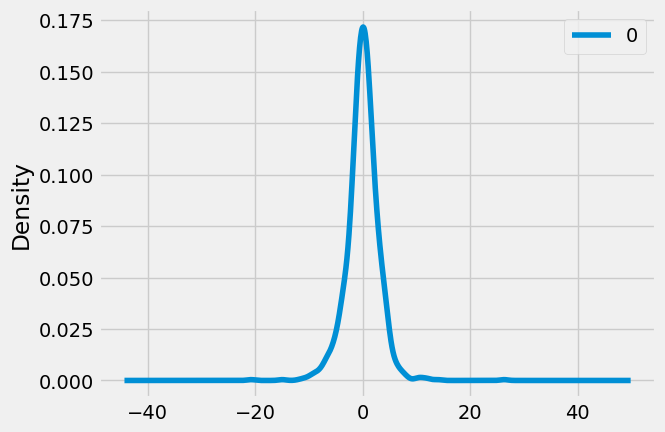

In [209]:
residuals.plot(kind='kde')

In [210]:
residuals.describe()

,0
count,1402.000000
mean,0.000004
std,2.996362
min,-20.791864
25%,-1.447380
50%,0.070802
75%,1.573289
max,26.304313


In [211]:
train_arima = train_data['Close_shift'].values
test_arima = test_data['Close_shift'].values

In [213]:
p_values = range(0,4)
d_values = range(0,3)
q_values = range(0,2)

In [214]:
# Way-1
import itertools
pdq = list(itertools.product(p_values,d_values,q_values))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (0, 2, 0),
 (0, 2, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (1, 2, 0),
 (1, 2, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (2, 2, 0),
 (2, 2, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1),
 (3, 2, 0),
 (3, 2, 1)]

In [217]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  for i in range(len(test_arima)):
        try:
          model = ARIMA(trin_arima,order=param)
          model_fit = model.fit(disp=0)
          pred_y = model_fit.forecast()[0]
          predictions.append(pred_y)
          error = mean_sqared-error(test, predictions)
          print(model_fit.aic)
          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
        except:
          continue

In [218]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      train, test = train_arima, test_arima
      predictions = list()
      for i in range(len(test_arima)):
        try:
          model = ARIMA(train_arima,order)
          model_fit = model.fit(disp=0)
          pred_y = model_fit.forecast()[0]
          predictions.append(pred_y)
          error = mean_sqared-error(test_arima, predictions)
          print("ARIMA%s, MSE=0.2, RMSE=0.2"% (order,error,math.sqrt(error)))
        except:
          continue


In [220]:
history = [x for x in train_arima]
print(type(history))
predictions = list()
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit() # Removed disp=0
    output = model_fit.predict(start=len(train_arima)+t-1, end = len(train_arima)+t,dynamic=True)
    #output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_arima, predictions)
print('MSE : %.3f' % error)
error2 = math.sqrt(error)
print('RMSE : %.3f' % error2)

<class 'list'>
MSE : 24.847
RMSE : 4.985


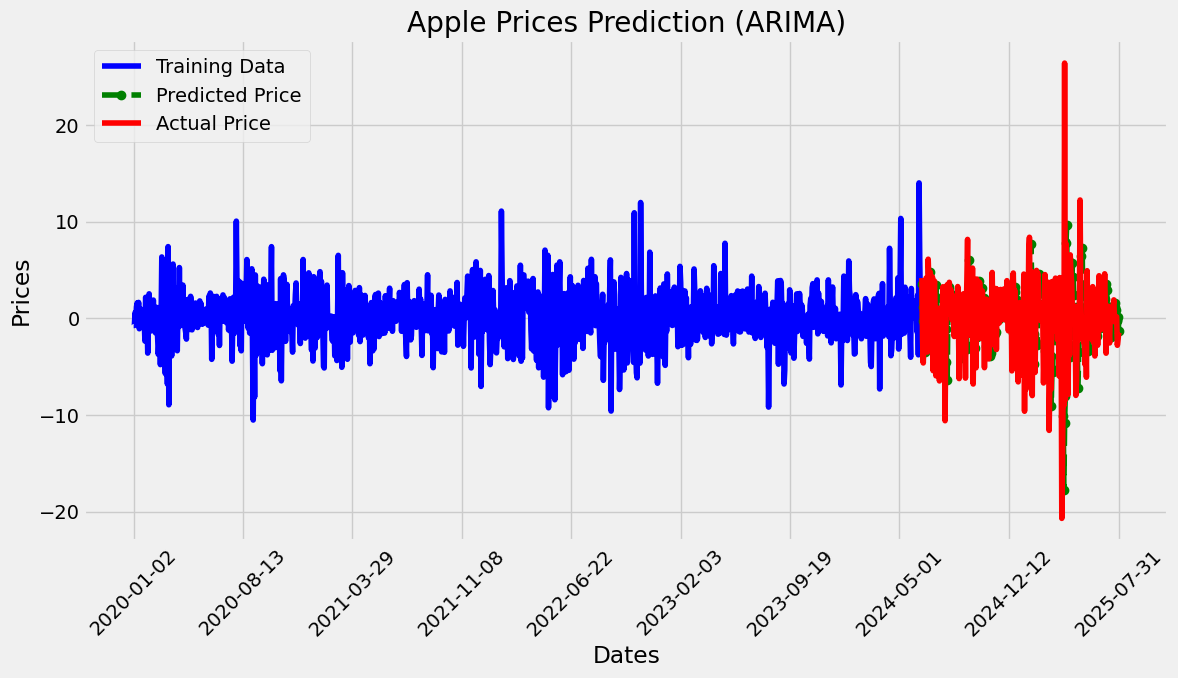

In [222]:
plt.figure(figsize=(12,7))
plt.plot(train_data.index, train_data['Close_shift'], color='blue', label='Training Data') # Plot training data against its index
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction (ARIMA)') # Corrected title
plt.xlabel('Dates')
plt.ylabel('Prices')

# Set x-axis ticks and labels spanning the entire dataset's date range
n_ticks = 10 # Adjust as needed
tick_indices = np.linspace(0, len(df) - 1, n_ticks, dtype=int)
tick_dates = df['Date'][tick_indices]
plt.xticks(tick_indices, tick_dates.dt.strftime('%Y-%m-%d'), rotation=45) # Rotate labels for better readability

plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

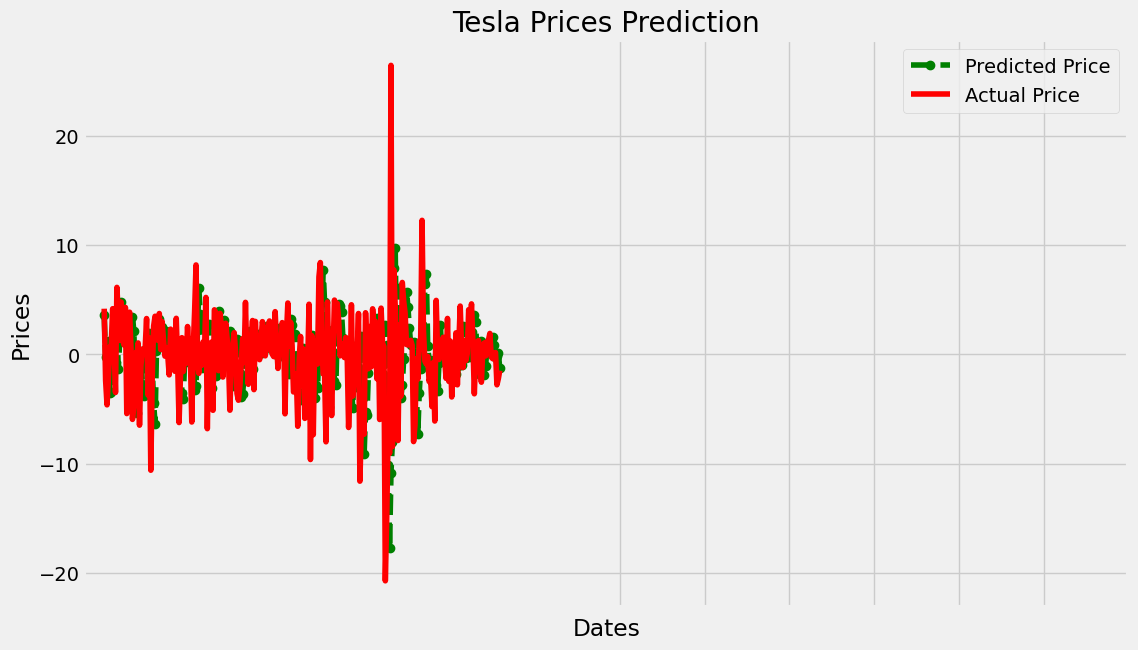

In [223]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close_shift'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()